In [1]:
! pip install  geocoder 
! pip install bs4
! pip install folium
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import geocoder
import pandas as pd
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import json
import requests
import folium
print("Libraries imported!!!.")
# to get coordinates

Libraries imported!!!.


In [0]:
Neighborhoods = ['Spanish Steps', 'Piazza del Popolo', 'Via Veneto', 'Trevi Fountain', 'Coliseum', 'Colle Oppio', 'Monti',
'via Cavour' ,'Campo dei Fiori', 'Piazza Navona', 'Pantheon'
'Termini Train Station', 'Piazza Esquilino', 'Santa Maria Maggiore',
'Trastevere', 'Vatican','Prati','Parioli','Flaminio','Aventino', 'Testaccio','Gianicolo','Monteverde','EUR'
'Pigneto','San Lorenzo','Appio','San Giovanni','Salaria','Nomentana','Trieste','Piramide','Ostiense']

In [0]:
rome_df = pd.DataFrame(Neighborhoods,columns=['Rome_Neighborhoods'])

In [4]:
rome_df.head()

,Rome_Neighborhoods
0,Spanish Steps
1,Piazza del Popolo
2,Via Veneto
3,Trevi Fountain
4,Coliseum


In [5]:
address = 'Rome'

geolocator = Nominatim(user_agent='foursquare_agent')
location = geolocator.geocode(address)
latitude = location.latitude
longitude  = location.longitude

print('latitude:', latitude)
print('longitude:', longitude)
print('The geograpical coordinate of Rome are {}, {}.'.format(latitude, longitude))

latitude: 41.8933203
longitude: 12.4829321
The geograpical coordinate of Rome are 41.8933203, 12.4829321.


In [0]:
def get_latlng(neighborhood):
    g = geocoder.arcgis('{}, Rome, Italy' .format(neighborhood))
    lat_lng_coords = g.latlng
    return lat_lng_coords

In [0]:
# coords = [ get_latlng(neighborhood) for neighborhood in rome_df["Rome_Neighborhoods"].tolist() ]

In [0]:
# df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
# rome_df['Latitude'] = df_coords['Latitude']
# rome_df['Longitude'] = df_coords['Longitude']

In [0]:
coords = []
for neighborhood in rome_df["Rome_Neighborhoods"].tolist():
  coords.append(get_latlng(neighborhood))


In [0]:
latitudes=[]
longitudes = []

for i in coords:
  latitudes.append(i[0])
  longitudes.append(i[1])

In [0]:
rome_df['Latitude'] = latitudes
rome_df['Longitude'] = longitudes

In [12]:
rome_df.head()

,Rome_Neighborhoods,Latitude,Longitude
0,Spanish Steps,41.90578,12.48244
1,Piazza del Popolo,41.91117,12.47638
2,Via Veneto,41.90625,12.48995
3,Trevi Fountain,41.90079,12.48336
4,Coliseum,41.89018,12.49231


In [13]:
rome_map = folium.Map(location=[latitude,longitude],zoom_start =11)

for lat, lng, label in zip(rome_df['Latitude'],rome_df['Longitude'],rome_df['Rome_Neighborhoods']):
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat,lng],
      radius=5,
      popup=label,
      color='blue',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7,
      parse_html=False).add_to(rome_map)  
rome_map

**Now, let's get the top 100 venues that are within a radius of 2000 meters.**



In [14]:
rome_df.head(2)

,Rome_Neighborhoods,Latitude,Longitude
0,Spanish Steps,41.90578,12.48244
1,Piazza del Popolo,41.91117,12.47638


In [15]:
CLIENT_ID = 'WCOTU2JERKB0V3L4BGRK5KDCDF0ARWGQGZDAYKEOK33T0OEK' # your Foursquare ID
CLIENT_SECRET = 'O5ZOAHMIHC33AUCZHVSLMNBKLSH4IE5FHF0ZYBL142EV3KH5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WCOTU2JERKB0V3L4BGRK5KDCDF0ARWGQGZDAYKEOK33T0OEK
CLIENT_SECRET:O5ZOAHMIHC33AUCZHVSLMNBKLSH4IE5FHF0ZYBL142EV3KH5


In [0]:
LIMIT =500
RADIUS =5000

venues =[]
for lat, log,neigh in zip(rome_df['Latitude'],rome_df['Longitude'],rome_df['Rome_Neighborhoods']):

  url ="https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
      
  CLIENT_ID,
  CLIENT_SECRET,
  VERSION,
  lat,
  log,
  LIMIT,
  RADIUS)


  results = requests.get(url).json()['response']['groups'][0]['items']

  for venue in results:
    venues.append((neigh,
                   lat,
                   log,
                   venue['venue']['name'],
                   venue['venue']['location']['lat'],
                   venue['venue']['location']['lng'],
                   venue['venue']['categories'][0]['name']))

In [0]:
df =pd.DataFrame(venues)

In [18]:
df.head()

,0,1,2,3,4,5,6
0,Spanish Steps,41.90578,12.48244,Venchi Cioccogelateria,41.906317,12.480129,Ice Cream Shop
1,Spanish Steps,41.90578,12.48244,Piazza di Spagna,41.906046,12.482057,Plaza
2,Spanish Steps,41.90578,12.48244,Fontana della Barcaccia,41.905763,12.482283,Fountain
3,Spanish Steps,41.90578,12.48244,Pompi,41.906418,12.480571,Dessert Shop
4,Spanish Steps,41.90578,12.48244,Piazza della Trinità dei Monti,41.906102,12.483151,Plaza


In [0]:
df.columns =['Borough','BoroughLatitude','BoroughLongitude',
             'VenueName','VenueLatitude','VenueLongitude','VenueCategory']

In [20]:
df.head()

,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Spanish Steps,41.90578,12.48244,Venchi Cioccogelateria,41.906317,12.480129,Ice Cream Shop
1,Spanish Steps,41.90578,12.48244,Piazza di Spagna,41.906046,12.482057,Plaza
2,Spanish Steps,41.90578,12.48244,Fontana della Barcaccia,41.905763,12.482283,Fountain
3,Spanish Steps,41.90578,12.48244,Pompi,41.906418,12.480571,Dessert Shop
4,Spanish Steps,41.90578,12.48244,Piazza della Trinità dei Monti,41.906102,12.483151,Plaza


In [21]:
df.VenueCategory.unique()


array(['Ice Cream Shop', 'Plaza', 'Fountain', 'Dessert Shop',
       'Historic Site', 'Hotel', 'Accessories Store', 'Boutique',
       'Shoe Store', 'Italian Restaurant', 'Jazz Club', 'Sandwich Place',
       'Bed & Breakfast', 'Mediterranean Restaurant', 'Cocktail Bar',
       'Road', 'Japanese Restaurant', 'Diner', 'Shopping Mall', 'Café',
       'Bistro', 'Brazilian Restaurant', 'Trattoria/Osteria', 'Juice Bar',
       'Restaurant', 'Gym / Fitness Center', 'Art Gallery', 'Bar',
       'Cosmetics Shop', 'Theater', 'Fast Food Restaurant', 'Bookstore',
       'Middle Eastern Restaurant', 'Monument / Landmark', 'Garden',
       'Wine Shop', 'Coffee Shop', 'Hotel Bar', 'Pizza Place', 'Wine Bar',
       'History Museum', 'Fried Chicken Joint', 'Arts & Crafts Store',
       'Clothing Store', 'Jewelry Store', 'Nightclub', 'Museum',
       'Art Museum', 'Hostel', 'Gym', 'Chinese Restaurant',
       'Food & Drink Shop', 'Roman Restaurant', 'Comfort Food Restaurant',
       'Piano Bar', 'Board

The below graph plot shows that ITALIAN RESTAURANTs are high in frequency

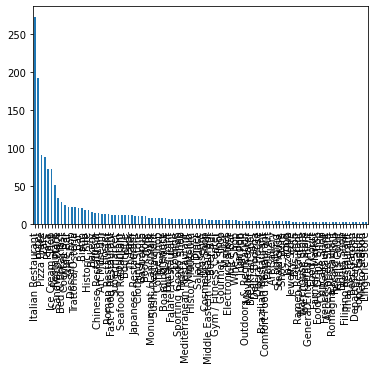

In [22]:
 df.VenueCategory.value_counts()[:100].plot.bar()

In [23]:
print("There are {} unique categories.".format(len(df.VenueCategory.unique())))

There are 163 unique categories.


Get Dummies

In [0]:
df_dummies = pd.get_dummies(df[['VenueCategory']],prefix='',prefix_sep='')

In [0]:
df_dummies['Rome_Neighborhoods'] = rome_df['Rome_Neighborhoods']

In [0]:
fixed_col = [df_dummies.columns[-1]] + list(df_dummies.columns[:-1])

In [27]:
fixed_col[:10]

['Rome_Neighborhoods',
 'Abruzzo Restaurant',
 'Accessories Store',
 'Argentinian Restaurant',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Bakery']

In [0]:
new_df_dummies = df_dummies[fixed_col]

In [29]:
new_df_dummies.head()

,Rome_Neighborhoods,Abruzzo Restaurant,Accessories Store,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bar,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Café,Camera Store,Casino,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,...,Resort,Restaurant,Road,Rock Club,Romagna Restaurant,Roman Restaurant,Roof Deck,Salad Place,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Sicilian Restaurant,Skating Rink,Soccer Stadium,South American Restaurant,Sporting Goods Shop,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Track Stadium,Trail,Train Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio
0,Spanish Steps,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Piazza del Popolo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Via Veneto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Trevi Fountain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Coliseum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
new_df_grouped = new_df_dummies.groupby(['Rome_Neighborhoods']).mean().reset_index()

In [31]:
new_df_grouped.head()

,Rome_Neighborhoods,Abruzzo Restaurant,Accessories Store,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bar,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Café,Camera Store,Casino,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,...,Resort,Restaurant,Road,Rock Club,Romagna Restaurant,Roman Restaurant,Roof Deck,Salad Place,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Sicilian Restaurant,Skating Rink,Soccer Stadium,South American Restaurant,Sporting Goods Shop,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Track Stadium,Trail,Train Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio
0,Appio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Aventino,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Campo dei Fiori,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Coliseum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Colle Oppio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
new_df_grouped.shape

(31, 164)

We want to Open an pizzeria, Let's find out the possibilities

In [0]:
rest_df =new_df_grouped[['Rome_Neighborhoods','Italian Restaurant']]

In [34]:
rest_df.head()

,Rome_Neighborhoods,Italian Restaurant
0,Appio,0
1,Aventino,0
2,Campo dei Fiori,0
3,Coliseum,0
4,Colle Oppio,0


In [0]:
# K-mean clustering

In [0]:
rm_clustering = rest_df.drop(["Rome_Neighborhoods"], 1)

In [37]:
rm_clustering[:5]

,Italian Restaurant
0,0
1,0
2,0
3,0
4,0


Let's Choose the value of K

In [0]:
from sklearn.cluster import KMeans

Kclusters =2
kmeans = KMeans(n_clusters=Kclusters, random_state=0).fit(rm_clustering)

In [39]:
len(kmeans.labels_)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

In [40]:
rest_df['Cluster Labels']=kmeans.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
rest_df.head()

,Rome_Neighborhoods,Italian Restaurant,Cluster Labels
0,Appio,0,0
1,Aventino,0,0
2,Campo dei Fiori,0,0
3,Coliseum,0,0
4,Colle Oppio,0,0


In [0]:
rest_df_merged = rest_df.join(rome_df.set_index('Rome_Neighborhoods'), on="Rome_Neighborhoods")

In [43]:
rest_df_merged.head()

,Rome_Neighborhoods,Italian Restaurant,Cluster Labels,Latitude,Longitude
0,Appio,0,0,41.885921,12.509072
1,Aventino,0,0,41.880731,12.484257
2,Campo dei Fiori,0,0,41.864510,12.470960
3,Coliseum,0,0,41.890180,12.492310
4,Colle Oppio,0,0,41.473828,12.643930


In [0]:
rest_df_merged.sort_values(["Cluster Labels"],inplace=True)

In [45]:
rest_df_merged.head()

,Rome_Neighborhoods,Italian Restaurant,Cluster Labels,Latitude,Longitude
0,Appio,0,0,41.885921,12.509072
28,Vatican,0,0,41.908990,12.451100
27,Trieste,0,0,41.924900,12.516520
26,Trevi Fountain,0,0,41.900790,12.483360
24,Testaccio,0,0,41.877700,12.475760


In [47]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(Kclusters)
ys = [i+x+(i*x)**2 for i in range(Kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(rest_df_merged['Latitude'], rest_df_merged['Longitude'], rest_df_merged['Rome_Neighborhoods'], rest_df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examine Clusters

In [48]:
rest_df_merged.loc[rest_df_merged['Cluster Labels'] ==0]

,Rome_Neighborhoods,Italian Restaurant,Cluster Labels,Latitude,Longitude
0,Appio,0,0,41.885921,12.509072
28,Vatican,0,0,41.908990,12.451100
27,Trieste,0,0,41.924900,12.516520
26,Trevi Fountain,0,0,41.900790,12.483360
24,Testaccio,0,0,41.877700,12.475760
23,Spanish Steps,0,0,41.905780,12.482440
21,San Lorenzo,0,0,41.687120,12.775640
20,San Giovanni,0,0,41.959850,12.801820
19,Salaria,0,0,41.992440,12.514250
18,Prati,0,0,41.908270,12.464980


Cluster 2

In [49]:
rest_df_merged.loc[rest_df_merged['Cluster Labels'] ==1]

,Rome_Neighborhoods,Italian Restaurant,Cluster Labels,Latitude,Longitude
6,Flaminio,1,1,41.92999,12.46451
22,Santa Maria Maggiore,1,1,41.89709,12.49953
25,Trastevere,1,1,41.88839,12.46621


Conclusion :

If we want to open an italian restaurant then we should open in the are mentoined in cluster 2 areas beacause there are less restaurant and 
compititon is low.

Cluster 2 shows high number of italian restaurant, but yes those places expirence high tourist.